### What is Multi-Indexing ?

- Creating a Hierarchical indexing of each element.
- Multiple index levels within a single index
- Level inside multiindex object

### Why we use Multi-Indexing indexing ?

Multi-Indexing is used to convert higher dimension data into a lower dimension data like DataFrame or Series.

`NOTE : ` Pandas is treated index and column exactly same so we can create multi-index at index and columns.

### Import Necessary Libraries.

In [36]:
import pandas as pd 
import numpy as np

### Series is 1D and DataFrames are 2D objects

- But why?
- And what exactly is index?

This is the thumb rule for checking dimension of any data.
We can check how many items provide to fetch any elements.

In [37]:
# can we have multiple index? Let's try 
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
s = pd.Series([1, 2, 3, 4, 5, 6, 7, 8], index=index_val)
s

(cse, 2019)    1
(cse, 2020)    2
(cse, 2021)    3
(cse, 2022)    4
(ece, 2019)    5
(ece, 2020)    6
(ece, 2021)    7
(ece, 2022)    8
dtype: int64

In [38]:
print(s[('cse', 2019)])
print(s[('ece',2019)])

1
5


In [14]:
# When we are accessing the element of cse only it will through an error.
# The Problem ?
s['cse']

KeyError: 'cse'

In [15]:
# The solution -> multiindex series(also known as Hierarchical Indexing) 

### How to create multiindex object

#### 1. pd.MultiIndex.from_tuples()
#### 2. pd.MultiIndex.from_product()

In [25]:
# 1. pd.MultiIndex.from_tuples() 
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)] 
multi_index = pd.MultiIndex.from_tuples(index_val)

In [26]:
multi_index.levels

FrozenList([['cse', 'ece'], [2019, 2020, 2021, 2022]])

In [27]:
multi_index.levels[0]

Index(['cse', 'ece'], dtype='object')

In [30]:
# 2. pd.MultiIndex.from_product()
pd.MultiIndex.from_product([['cse', 'ece'], [2019, 2020, 2021, 2022]])

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

### multi_index Series

In [40]:
# creating a series with multiindex object. 
s = pd.Series([1, 2, 3, 4, 5, 6, 7, 8], index = multi_index)
s

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [41]:
# how to fetch items from such a series. 
print(s[('cse', 2021)])

3


In [42]:
s['cse']

2019    1
2020    2
2021    3
2022    4
dtype: int64

In [43]:
s['ece']

2019    5
2020    6
2021    7
2022    8
dtype: int64

##### unstack function
- this function is used to convert Pandas series to Dataframe.

In [76]:
temp_df = s.unstack()
temp_df

,2019,2020,2021,2022
cse,1,2,3,4
ece,5,6,7,8


##### stack function 
- this function is used to convert a pandas dataframe to pandas series.

In [72]:
s = temp_df.stack()
s

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

### multi-index dataframe

In [53]:
branch_df = pd.DataFrame(
    [
        [1,2],
        [3,4],
        [5,6],
        [7,8],
        [9,10],
        [11,12],
        [13,14],
        [15,16],
    ], 
    index=multi_index, 
    columns=['Average_package', 'Students']
)

branch_df

Average_package  Students
cse 2019                1         2
    2020                3         4
    2021                5         6
    2022                7         8
ece 2019                9        10
    2020               11        12
    2021               13        14
    2022               15        16

In [54]:
branch_df['Average_package']

cse  2019     1
     2020     3
     2021     5
     2022     7
ece  2019     9
     2020    11
     2021    13
     2022    15
Name: Average_package, dtype: int64

#### Are columns really different from index?
- Pandas treat same both rows and columns

In [56]:
# multiindex df from columns perspective 
branch_df1 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
    ], 
    index=[2019, 2020, 2021, 2022], 
    columns=pd.MultiIndex.from_product([['Delhi', 'Mumbai'], ['Average_Package', 'Students']])
)

branch_df1

Delhi                   Mumbai         
     Average_Package Students Average_Package Students
2019               1        2               0        0
2020               3        4               0        0
2021               5        6               0        0
2022               7        8               0        0

In [63]:
branch_df1.iloc[1 : 3]

Delhi                   Mumbai         
     Average_Package Students Average_Package Students
2020               3        4               0        0
2021               5        6               0        0

In [64]:
branch_df1.loc[2019]

Delhi   Average_Package    1
        Students           2
Mumbai  Average_Package    0
        Students           0
Name: 2019, dtype: int64

In [66]:
# Multiindex dataframe in terms of both columns and index 
branch_df2 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multi_index,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df2

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [67]:
branch_df2.loc['cse']

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [70]:
branch_df2.iloc[1 : 4]

delhi               mumbai         
         avg_package students avg_package students
cse 2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0

### Stacking and Unstacking
- **unstack :** Using this function we take inner index from row to columns.
- **stack :** Using this function we take inner index from Column to row.

In [88]:
branch_df2.unstack().stack(future_stack = True).stack(future_stack = True)

delhi  mumbai
cse 2019 avg_package      1       0
         students         2       0
    2020 avg_package      3       0
         students         4       0
    2021 avg_package      5       0
         students         6       0
    2022 avg_package      7       0
         students         8       0
ece 2019 avg_package      9       0
         students        10       0
    2020 avg_package     11       0
         students        12       0
    2021 avg_package     13       0
         students        14       0
    2022 avg_package     15       0
         students        16       0

### Working with multiindex dataframes. 

In [89]:
# head and tail 
branch_df2.head()

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0

In [90]:
# shape 
branch_df2.shape

(8, 4)

In [91]:
# info function 
branch_df2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', np.int64(2019)) to ('ece', np.int64(2022))
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   8 non-null      int64
 1   (delhi, students)      8 non-null      int64
 2   (mumbai, avg_package)  8 non-null      int64
 3   (mumbai, students)     8 non-null      int64
dtypes: int64(4)
memory usage: 932.0+ bytes


In [93]:
# describe function
branch_df2.describe()

delhi                 mumbai         
      avg_package   students avg_package students
count    8.000000   8.000000         8.0      8.0
mean     8.000000   9.000000         0.0      0.0
std      4.898979   4.898979         0.0      0.0
min      1.000000   2.000000         0.0      0.0
25%      4.500000   5.500000         0.0      0.0
50%      8.000000   9.000000         0.0      0.0
75%     11.500000  12.500000         0.0      0.0
max     15.000000  16.000000         0.0      0.0

In [98]:
# duplicated and isnull 
branch_df2.duplicated()

cse  2019    False
     2020    False
     2021    False
     2022    False
ece  2019    False
     2020    False
     2021    False
     2022    False
dtype: bool

In [99]:
branch_df2.isnull()

delhi               mumbai         
         avg_package students avg_package students
cse 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False
ece 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False

#### Extracting rows from this datafarme. 

In [102]:
# extracting single row 
branch_df2.loc[('cse', 2022)]

delhi   avg_package    7
        students       8
mumbai  avg_package    0
        students       0
Name: (cse, 2022), dtype: int64

In [105]:
# extracting multiple rows. 
branch_df2.loc[('cse', 2019) : ('ece', 2019) : 2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [107]:
# using iloc
branch_df2.iloc[0 : 5 : 2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [109]:
# extracting columns 
branch_df2['delhi']

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [110]:
# extracting columns 
branch_df2['delhi']['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

In [114]:
# extract some of the columns. 
branch_df2.iloc[ : , 1 : 3]

delhi      mumbai
         students avg_package
cse 2019        2           0
    2020        4           0
    2021        6           0
    2022        8           0
ece 2019       10           0
    2020       12           0
    2021       14           0
    2022       16           0

In [116]:
# Extracting both using fancy indexing
branch_df2.iloc[[0,4],[1,2]]

,,delhi,mumbai
,,students,avg_package
cse,2019,2,0
ece,2019,10,0


In [120]:
# sort index based on all index that df have. 
branch_df2.sort_index(ascending=False)

delhi               mumbai         
         avg_package students avg_package students
ece 2022          15       16           0        0
    2021          13       14           0        0
    2020          11       12           0        0
    2019           9       10           0        0
cse 2022           7        8           0        0
    2021           5        6           0        0
    2020           3        4           0        0
    2019           1        2           0        0

In [121]:
# sort index in such a way outer is ascending and inner is descending. 
branch_df2.sort_index(ascending=[True, False])

delhi               mumbai         
         avg_package students avg_package students
cse 2022           7        8           0        0
    2021           5        6           0        0
    2020           3        4           0        0
    2019           1        2           0        0
ece 2022          15       16           0        0
    2021          13       14           0        0
    2020          11       12           0        0
    2019           9       10           0        0

In [122]:
# sort index only for anyone index from multiple index. 
branch_df2.sort_index(level=0, ascending=False)

delhi               mumbai         
         avg_package students avg_package students
ece 2022          15       16           0        0
    2021          13       14           0        0
    2020          11       12           0        0
    2019           9       10           0        0
cse 2022           7        8           0        0
    2021           5        6           0        0
    2020           3        4           0        0
    2019           1        2           0        0

In [123]:
# sort index only for anyone index from multiple index.  
branch_df2.sort_index(level=1, ascending=False)

delhi               mumbai         
         avg_package students avg_package students
ece 2022          15       16           0        0
cse 2022           7        8           0        0
ece 2021          13       14           0        0
cse 2021           5        6           0        0
ece 2020          11       12           0        0
cse 2020           3        4           0        0
ece 2019           9       10           0        0
cse 2019           1        2           0        0

In [125]:
# multiindex dataframe(col) -> transpose
branch_df2.transpose()

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

In [128]:
# swaplevel
branch_df2.swaplevel(axis=1)

avg_package students avg_package students
               delhi    delhi      mumbai   mumbai
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

### Long Vs Wide Data
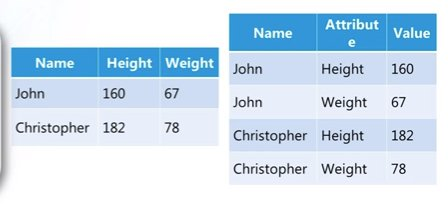

**Wide format** is where we have a single row for every data point with multiple columns to hold the values of various attributes.

**Long format** is where, for each data point we have as many rows as the number of attributes and each row contains the value of a particular attribute for a given data point.

In [131]:
# melt -> simple example branch
# wide to long
pd.DataFrame({'cse':[120]}).melt()

,variable,value
0,cse,120


In [141]:
# melt -> branch with year 
pd.DataFrame({'CSE' : [100], 'ECE' : [80], 'Mech' : [50], 'Civil' : [60]}).melt(var_name='Branch', value_name='num_students')

,Branch,num_students
0,CSE,100
1,ECE,80
2,Mech,50
3,Civil,60


In [146]:
# this dataframe is a wide format data. 
wide_df = pd.DataFrame(
    {
        'Branch' : ['CSE','ECE','Mech'],
        '2020' : [100,150,60],
        '2021' : [120,130,80],
        '2022' : [150,140,70], 
        '2023' : [200, 100, 50]
    }
)
wide_df

,Branch,2020,2021,2022,2023
0,CSE,100,120,150,200
1,ECE,150,130,140,100
2,Mech,60,80,70,50


In [151]:
wide_df.melt(id_vars=['Branch'], var_name='Year', value_name='num_students')

,Branch,Year,num_students
0,CSE,2020,100
1,ECE,2020,150
2,Mech,2020,60
3,CSE,2021,120
4,ECE,2021,130
5,Mech,2021,80
6,CSE,2022,150
7,ECE,2022,140
8,Mech,2022,70
9,CSE,2023,200


### Real world example of the meth function. 

In [152]:
# melt -> real world example 
deaths_df = pd.read_csv('./Datasets/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('./Datasets/time_series_covid19_confirmed_global.csv')

In [155]:
# this shows that this is a wide format data so analysis is difficult on this dataset.
deaths_df.shape

(289, 1081)

In [156]:
# this shows that this is a wide format data so analysis is difficult on this dataset.
confirmed_df.shape

(289, 1081)

#### we need to fetch the columns 
- [Country, Date, Death, confirm_cases]

In [165]:
death_num_df = deaths_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='num_death')

In [166]:
confirmed_num_df = confirmed_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='confirm_cases')

In [176]:
desired_df = confirmed_num_df.merge(death_num_df, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'])

In [180]:
desired_df[['Country/Region', 'Date', 'confirm_cases', 'num_death']].tail()

,Country/Region,Date,confirm_cases,num_death
311248,West Bank and Gaza,1/2/23,703228,5708
311249,Winter Olympics 2022,1/2/23,535,0
311250,Yemen,1/2/23,11945,2159
311251,Zambia,1/2/23,334661,4024
311252,Zimbabwe,1/2/23,259981,5637


### Pivot Table in pandas. 
The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
tip_df = sns.load_dataset('tips')
tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
# Here we want to see how much payment is done by male and female. 
tip_df.groupby('sex', observed=False)[['total_bill']].mean()

,total_bill
sex,
Male,20.744076
Female,18.056897


In [16]:
# Here we want to see how much payment is done by male smoker and female smoker.
tip_df.groupby(['sex', 'smoker'], observed=True)[['total_bill']].mean().unstack()

total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

`NOTE : ` But we can do it pivot_table function quite easily.

In [19]:
tip_df.pivot_table(index='sex', columns='smoker', values='total_bill', observed=True)

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [27]:
# aggfunc which is used to pass mathematical functions for calculation. 
tip_df.pivot_table(index='sex', columns='smoker', values='total_bill', observed=True, aggfunc='sum')

smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [24]:
tip_df.pivot_table(index=['sex', 'smoker'], columns=['day', 'time'], values='total_bill', observed=True)

day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [31]:
# all cols together. 
tip_df.pivot_table(index='sex', columns='smoker', values='size', observed=True)

smoker,Yes,No
sex,,
Male,2.500000,2.711340
Female,2.242424,2.592593


In [32]:
# multidimensional analysis using pivot table. 

In [33]:
tip_df.pivot_table(index=['sex', 'smoker'], columns=['day', 'time'], aggfunc={'size' : 'mean', 'total_bill' : 'mean', 'tip' : 'max'}, observed=True)

size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                    \
day                    Fri           Sat    Sun       Thur               Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner      Lunch   
sex    smoker                                                                  
Male   Yes       NaN  2.20   4.73  10.00    6.5  19.171000    NaN  11.386667   
       No        NaN   NaN   3.50   9.00    6.0  18.486500    NaN        NaN   
Female Yes       NaN  3.48   4.30   6.50    4.0  19.218571    NaN  13.260000   
       No        3.0  3.00   3.25   4.67    5.2  15.899167  18.78  15.980000   

                                             
day                          Sat        Sun  
time           Dinner     Dinner     Dinner  
sex    smoker                                
Male   Yes     25.892  21.837778  26.141333  
       No      17.475  19.929063  20.403256  
Female Yes     12.200  20.266667  16.540000  
       No      22.750  19.003846  20.824286

In [34]:
# margins 
tip_df.pivot_table(index='sex', columns='smoker', values='total_bill', observed=True, aggfunc='sum', margins=True)

smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [36]:
# plotting graphs 
expense_df = pd.read_csv('./Datasets/expense_data_1.csv')
expense_df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [37]:
expense_df['Category'].value_counts()

Category
Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: count, dtype: int64

In [38]:
expense_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [41]:
expense_df['Date'] = pd.to_datetime(expense_df['Date'])

In [42]:
expense_df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [47]:
expense_df['month'] = expense_df['Date'].dt.month_name()

In [48]:
expense_df

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March
...,...,...,...,...,...,...,...,...,...,...,...,...
272,2021-11-22 14:16:00,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0,November
273,2021-11-22 14:16:00,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0,November
274,2021-11-21 17:07:00,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0,November
275,2021-11-21 15:50:00,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0,November


In [50]:
expense_df.pivot_table(index='month', columns='Category', values='INR')

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
month,,,,,,,,,,,,,
December,2750.0,518.0,196.0,NaN,112.995088,NaN,4800.0,137.692308,NaN,NaN,400.0,256.86,182.80
February,NaN,399.0,NaN,NaN,214.609615,NaN,702.0,2000.000000,NaN,NaN,NaN,900.00,507.88
January,1000.0,NaN,NaN,1400.0,207.102500,NaN,4580.0,399.333333,NaN,8000.0,NaN,200.00,285.00
March,NaN,NaN,NaN,NaN,65.000000,NaN,NaN,300.000000,NaN,NaN,NaN,NaN,30.00
November,2000.0,NaN,NaN,NaN,122.092308,115.0,NaN,2000.000000,3.0,NaN,NaN,NaN,66.20


In [58]:
expense_df.pivot_table(index='month', columns='Category', fill_value=0, values='INR', margins=True)

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation,All
month,,,,,,,,,,,,,,
December,2750.000000,518.0,196.0,0.0,112.995088,0.0,4800.000000,137.692308,0.0,0.0,400.0,256.860,182.800000,321.847640
February,0.000000,399.0,0.0,0.0,214.609615,0.0,702.000000,2000.000000,0.0,0.0,0.0,900.000,507.880000,667.863889
January,1000.000000,0.0,0.0,1400.0,207.102500,0.0,4580.000000,399.333333,0.0,8000.0,0.0,200.000,285.000000,438.266413
March,0.000000,0.0,0.0,0.0,65.000000,0.0,0.000000,300.000000,0.0,0.0,0.0,0.000,30.000000,160.714286
November,2000.000000,0.0,0.0,0.0,122.092308,115.0,0.000000,2000.000000,3.0,0.0,0.0,0.000,66.200000,217.811429
All,2333.333333,484.0,196.0,1400.0,157.067179,115.0,2031.333333,631.133333,3.0,8000.0,400.0,502.744,296.896774,410.750903


<Axes: xlabel='month'>

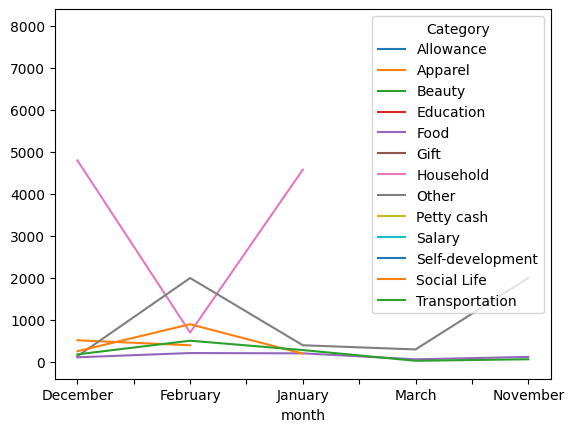

In [51]:
expense_df.pivot_table(index='month', columns='Category', values='INR').plot()

<Axes: xlabel='month'>

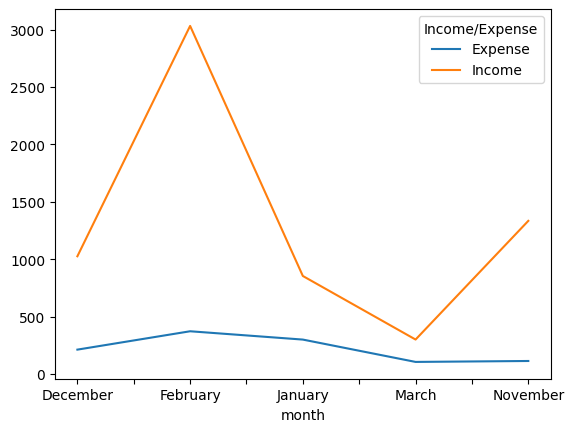

In [55]:
expense_df.pivot_table(index='month', columns='Income/Expense', values='INR').plot()

<Axes: xlabel='month'>

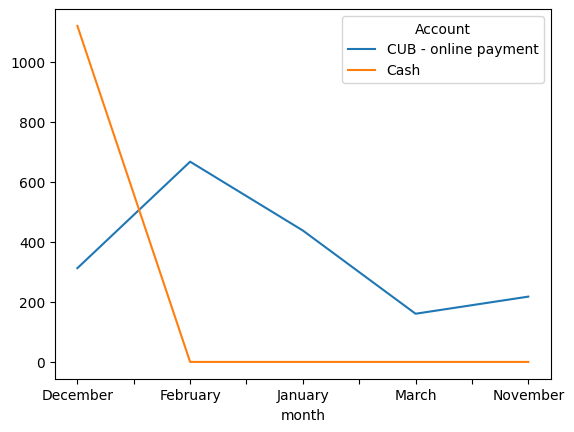

In [59]:
expense_df.pivot_table(index='month', columns='Account', fill_value=0, values='INR').plot()